# Title: An analysis to predict customer churn & improve customer retention

## Overview

The backbone of every business are those who patronize it, in this case customers. They are the ones that determine the value of products or services that businesses offer. Without the customer, there really is no business. Businesses strive to get new customers all the time but are also concerned with their existing customers coming back. This has made customer churn a very important metric for any serious company or business.
Customer churn is the loss of any customer for any reason possible. In this analysis we will be taking a look at the possible reasons for the loss of customers in a telecommunications company. We also aim to build predictive models that will identify customers that are likely to churn and the factors that lead to them doing so to enable the company to take proactive steps to keep customers.

## Setup

### Import Necessary Libraries

In [1]:
# Retrieving Data from Database
# import pyodbc

# Data handling
import pandas as pd
import numpy as np 

#  Visualisation 
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# Feature Processing 
from sklearn import preprocessing
from sklearn.impute import SimpleImputer

# Other packages
import os
import warnings
warnings.filterwarnings('ignore')

#display all columns and rows 
pd.set_option('display.max_columns', None)

### Data Loading

The data was retrieved from a SQL database, a One Drive folder and github repository and stored on a local machine.

In [2]:
# Load 1st dataset
df1= pd.read_csv('Telco-churn-first-3000.csv')

# Load 2nd dataset
test = pd.read_excel('Telco-churn-second-2000.xlsx')

# Load 3rd dataset 
df3 = pd.read_csv('LP2_Telco-churn-last-2000.csv')

The 1st and 3rd datasets are to be concactenated to create a single dataset that would be used to train the models

In [3]:
# Concactenate datasets
train = pd.concat([df1, df3])

In [4]:
train.head()

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0.0,7590-VHVEG,Female,False,True,False,1,False,NaN,DSL,False,True,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.850000381469727,False
1,1.0,5575-GNVDE,Male,False,False,False,34,True,False,DSL,True,False,True,False,False,False,One year,False,Mailed check,56.950001,1889.5,False
2,2.0,3668-QPYBK,Male,False,False,False,2,True,False,DSL,True,True,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.1500015258789,True
3,3.0,7795-CFOCW,Male,False,False,False,45,False,NaN,DSL,True,False,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.75,False
4,4.0,9237-HQITU,Female,False,False,False,2,True,False,Fiber optic,False,False,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.64999389648438,True


In [5]:
# Find the number of rows and columns
train.shape

(7086, 22)

In [6]:
# Get info on whole dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7086 entries, 0 to 2042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        5043 non-null   float64
 1   customerID        7086 non-null   object 
 2   gender            7086 non-null   object 
 3   SeniorCitizen     7086 non-null   object 
 4   Partner           7086 non-null   object 
 5   Dependents        7086 non-null   object 
 6   tenure            7086 non-null   int64  
 7   PhoneService      7086 non-null   object 
 8   MultipleLines     6817 non-null   object 
 9   InternetService   7086 non-null   object 
 10  OnlineSecurity    6435 non-null   object 
 11  OnlineBackup      6435 non-null   object 
 12  DeviceProtection  6435 non-null   object 
 13  TechSupport       6435 non-null   object 
 14  StreamingTV       6435 non-null   object 
 15  StreamingMovies   6435 non-null   object 
 16  Contract          7086 non-null   object 
 17  

The following describes the columns present in the data.

Gender -- Whether the customer is a male or a female

SeniorCitizen -- Whether a customer is a senior citizen or not

Partner -- Whether the customer has a partner or not (Yes, No)

Dependents -- Whether the customer has dependents or not (Yes, No)

Tenure -- Number of months the customer has stayed with the company

Phone Service -- Whether the customer has a phone service or not (Yes, No)

MultipleLines -- Whether the customer has multiple lines or not

InternetService -- Customer's internet service provider (DSL, Fiber Optic, No)

OnlineSecurity -- Whether the customer has online security or not (Yes, No, No Internet)

OnlineBackup -- Whether the customer has online backup or not (Yes, No, No Internet)

DeviceProtection -- Whether the customer has device protection or not (Yes, No, No internet service)

TechSupport -- Whether the customer has tech support or not (Yes, No, No internet)

StreamingTV -- Whether the customer has streaming TV or not (Yes, No, No internet service)

StreamingMovies -- Whether the customer has streaming movies or not (Yes, No, No Internet service)

Contract -- The contract term of the customer (Month-to-Month, One year, Two year)

PaperlessBilling -- Whether the customer has paperless billing or not (Yes, No)

Payment Method -- The customer's payment method (Electronic check, mailed check, Bank transfer(automatic), Credit card(automatic))

MonthlyCharges -- The amount charged to the customer monthly

TotalCharges -- The total amount charged to the customer

Churn -- Whether the customer churned or not (Yes or No)

In [7]:
# Drop Unnamed: 0 column
train= train.drop('Unnamed: 0', axis =1)

In [8]:
# Check columns 
train.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [9]:
# Get a description of numerical features
train.describe()

,tenure,MonthlyCharges
count,7086.000000,7086.000000
mean,32.597516,64.981329
std,24.483936,30.038249
min,0.000000,18.400000
25%,9.000000,35.762500
50%,30.000000,70.449997
75%,55.750000,89.900002
max,72.000000,118.650002


In [10]:
# Get summary statistics for all columns in churn_data
summary_stats = train.describe(include=['O'])
summary_stats

,customerID,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7086,7086,7086,7086,7086,7086,6817,7086,6435,6435,6435,6435,6435,6435,7086,7086,7086,7081,7085
unique,5043,2,6,4,4,4,5,3,5,5,5,5,5,5,3,4,4,4870,4
top,3186-AJIEK,Male,False,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,20.2,No
freq,2,3581,2525,2094,2824,3646,1974,3153,2058,1822,1846,1992,1656,1662,3847,2440,2396,10,2974


## Questions 

1. Does the gender of the customer affect the churn rate?
2. Are senior citizens more reluctant to churn than those who are not senior citizens?
3. How does the amount spent per month affect churn?
4. How important is tech support in customer retention?
5. Does internet service subscription affect the payment method used?
6. What tenure range is very likely to churn? 
7. Does having a partner and dependents influence churn rate positively or negatively?
8. Do customers with both phone service and internet service churn more than customers with one of the two?








## Hypothesis 

###### NULL : Customers on the yearly contracts are not likely to churn
###### ALTERNATE : Customers on the yearly contracts are more likely to churn

## Data Cleaning 

### Training Dataset

#### Missing Values

In [11]:
# Check for null values
train.isna().sum()

customerID            0
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines       269
InternetService       0
OnlineSecurity      651
OnlineBackup        651
DeviceProtection    651
TechSupport         651
StreamingTV         651
StreamingMovies     651
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges          5
Churn                 1
dtype: int64

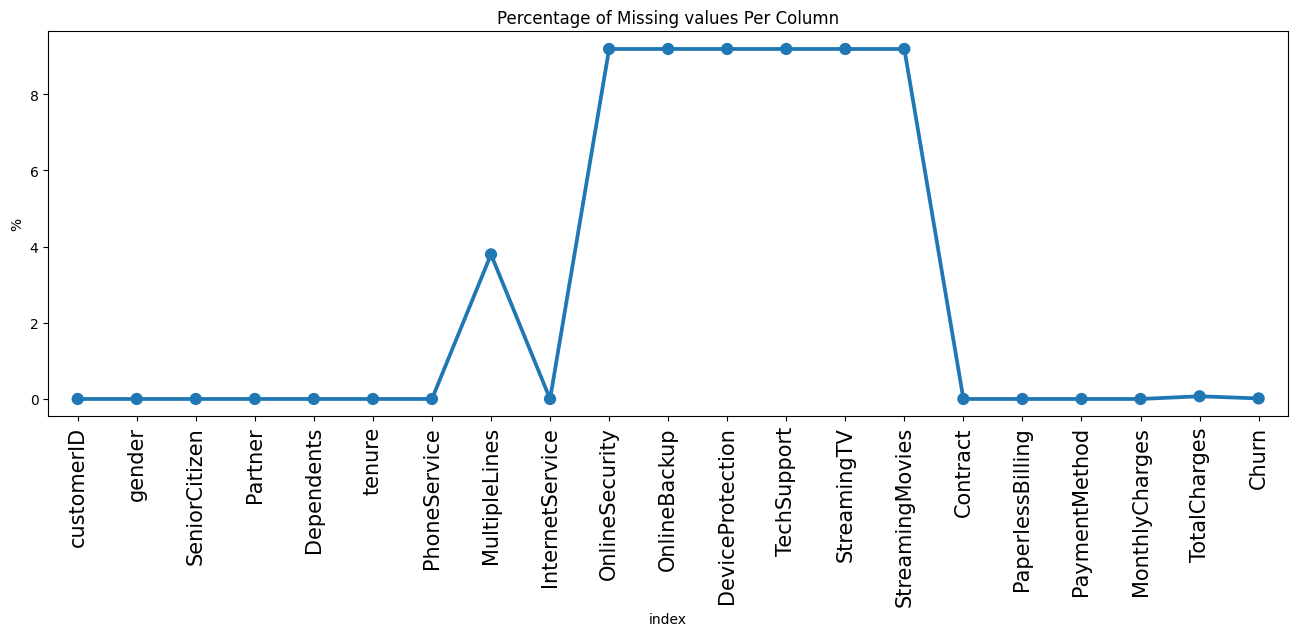

In [12]:
# Plot to show missing values per column

null_values= pd.DataFrame((train.isnull().sum())*100/train.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot(x='index', y=0,data=null_values)
plt.xticks(rotation =90,fontsize =15)
plt.title("Percentage of Missing values Per Column")
plt.ylabel("%")
plt.show()


For missing/null values, we will be filling them with the most frequent values


In [13]:
# Fill missing values wiht most frequent values in e
train = train.fillna(train.mode().iloc[0])

In [14]:
# Check for null values
train.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

#### Duplicates


In [15]:
train.shape

(7086, 21)

#### Check for duplicates 

In [16]:
# Find sum of duplicates
train.duplicated().sum()

0

In [17]:
# Drop duplicates 
train = train.drop_duplicates()

### Test Dataset

In [18]:
test.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7613-LLQFO,Male,0,No,No,12,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,84.45,1059.55
1,4568-TTZRT,Male,0,No,No,9,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.40,181.8
2,9513-DXHDA,Male,0,No,No,27,Yes,No,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,No,Electronic check,81.70,2212.55
3,2640-PMGFL,Male,0,No,Yes,27,Yes,Yes,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,79.50,2180.55
4,3801-HMYNL,Male,0,Yes,Yes,1,Yes,No,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,No,Mailed check,89.15,89.15


In [19]:
test.shape

(2000, 20)

In [20]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        2000 non-null   object 
 1   gender            2000 non-null   object 
 2   SeniorCitizen     2000 non-null   int64  
 3   Partner           2000 non-null   object 
 4   Dependents        2000 non-null   object 
 5   tenure            2000 non-null   int64  
 6   PhoneService      2000 non-null   object 
 7   MultipleLines     2000 non-null   object 
 8   InternetService   2000 non-null   object 
 9   OnlineSecurity    2000 non-null   object 
 10  OnlineBackup      2000 non-null   object 
 11  DeviceProtection  2000 non-null   object 
 12  TechSupport       2000 non-null   object 
 13  StreamingTV       2000 non-null   object 
 14  StreamingMovies   2000 non-null   object 
 15  Contract          2000 non-null   object 
 16  PaperlessBilling  2000 non-null   object 


#### Missing Values

In [21]:
test.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

In [22]:
test.duplicated().sum()

0

## EDA

#### Training Dataset

In this section we explore the dataset to get deeper insights

##### Customer ID Feature

In [23]:
train['customerID']

0       7590-VHVEG
1       5575-GNVDE
2       3668-QPYBK
3       7795-CFOCW
4       9237-HQITU
           ...    
2038    6840-RESVB
2039    2234-XADUH
2040    4801-JZAZL
2041    8361-LTMKD
2042    3186-AJIEK
Name: customerID, Length: 7086, dtype: object

Customer ID will not be needed for analysis and modeling so can be dropped

In [24]:
train = train.drop('customerID', axis=1)

##### Gender column

In [25]:
train['gender'].unique()

array(['Female', 'Male'], dtype=object)

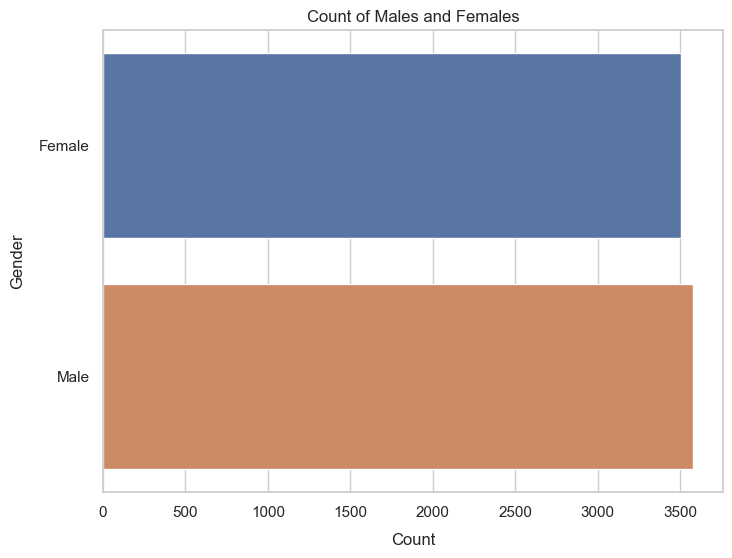

In [26]:
# Set the style of the plot
sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))  
# Create the horizontal bar plot
sns.countplot(y='gender', data=train)
plt.xlabel("Count", labelpad=10)
plt.ylabel("Gender", labelpad=10)
plt.title("Count of Males and Females", y=1)

# Show the plot
plt.show()

##### Senior Citizen column

In [27]:
train['SeniorCitizen'].unique()

array(['False', 'True', '0', '1', 0, 1], dtype=object)

In [28]:
# Change all entries under Senior Citizen to 0 or 1
replacement_values = {'False': 0, 'True': 1, '0': 0, '1': 1}

train['SeniorCitizen'] = train['SeniorCitizen'].replace(replacement_values)

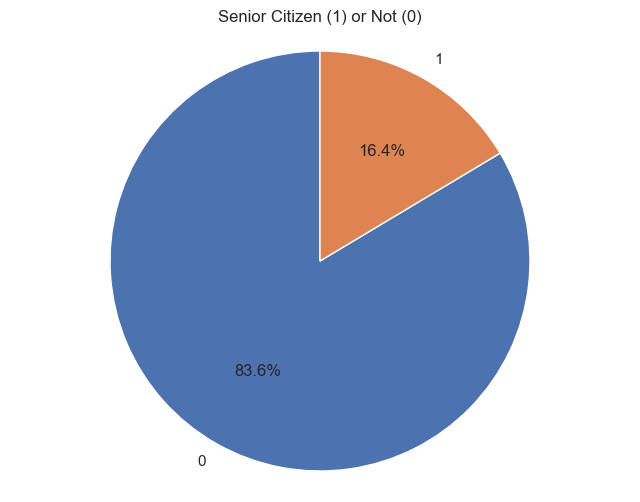

In [29]:
# Set the style of the plot
sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))

# Calculate the count of each category
counts = train['SeniorCitizen'].value_counts()

# Create the pie chart
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title("Senior Citizen (1) or Not (0)")

# Show the plot
plt.show()

##### Partner Column

In [30]:
train['Partner'].unique()

array(['True', 'False', 'No', 'Yes'], dtype=object)

In [31]:
# Change all entries under Partner to 'Yes' or 'No'
replacement_values = {'False': 'No', 'True': 'Yes'}

train['Partner'] = train['Partner'].replace(replacement_values)

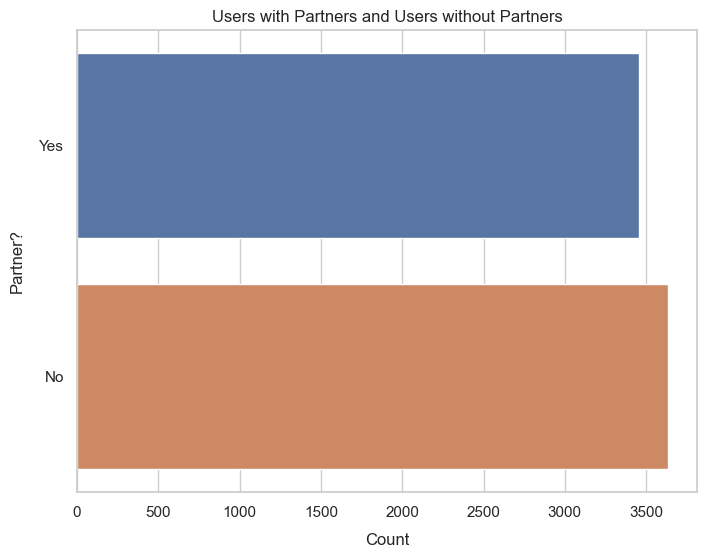

In [32]:
# Set the style of the plot
sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))  
# Create the horizontal bar plot
sns.countplot(y='Partner', data=train)
plt.xlabel("Count", labelpad=10)
plt.ylabel("Partner?", labelpad=10)
plt.title("Users with Partners and Users without Partners", y=1)

# Show the plot
plt.show()

##### Dependents

In [33]:
train['Dependents'].unique()

array(['False', 'True', 'No', 'Yes'], dtype=object)

In [34]:
# Change all entries under Dependednts to 'Yes' or 'No'
replacement_values = {'False': 'No', 'True': 'Yes'}

train['Dependents'] = train['Dependents'].replace(replacement_values)

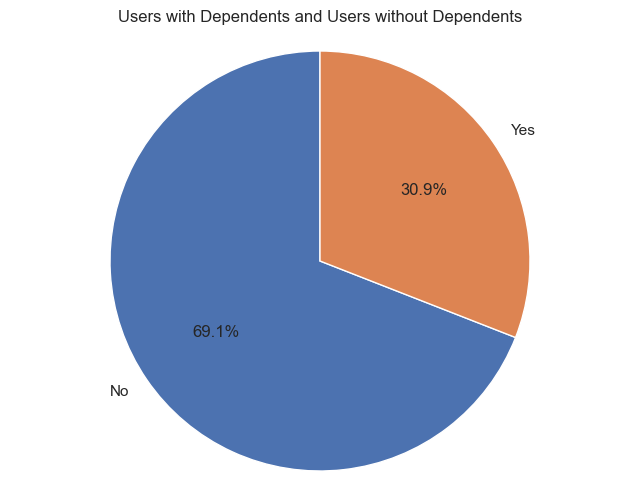

In [35]:
# Set the style of the plot
sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))

# Calculate the count of each category
counts = train['Dependents'].value_counts()

# Create the pie chart
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title("Users with Dependents and Users without Dependents")

# Show the plot
plt.show()

##### Tenure

In [36]:
train['tenure'].unique()

array([ 1, 34,  2, 45,  8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71,
       21, 12, 30, 47, 72, 17, 27,  5, 46, 11, 70, 63, 43, 15, 60, 18, 66,
        9,  3, 31, 50, 64, 56,  7, 42, 35, 48, 29, 65, 38, 68, 32, 55, 37,
       36, 41,  6,  4, 33, 67, 23, 57, 61, 14, 20, 53, 40, 59, 24, 44, 19,
       54, 51, 26,  0, 39], dtype=int64)

In [37]:
train['tenure'].max()

72

In [38]:
train['tenure'].min()

0

In [39]:
# Group the tenure in bins of 12 months
labels = ["{0} - {1}".format(i, i + 11) for i in range(1, 72, 12)]

train['tenure_range'] = pd.cut(train.tenure, range(1, 80, 12), right=False, labels=labels)

# Counts of each tenure range
train['tenure_range'].value_counts()

tenure_range
1 - 12     2142
61 - 72    1420
13 - 24    1034
25 - 36     842
49 - 60     840
37 - 48     797
Name: count, dtype: int64

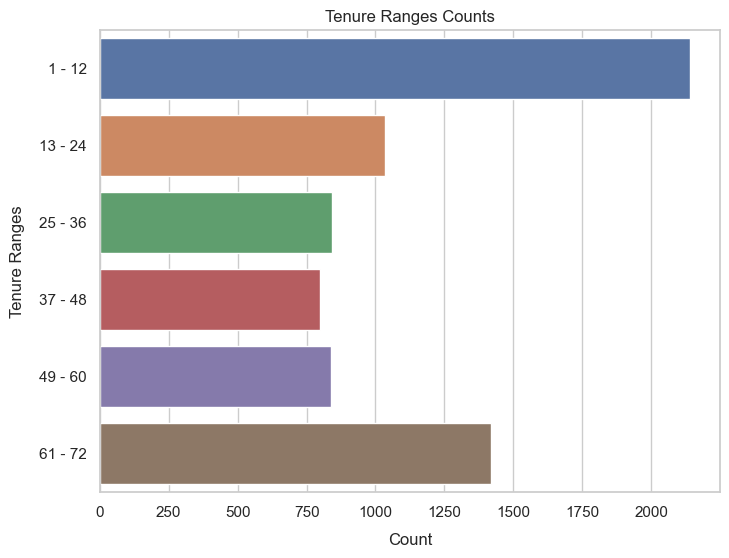

In [40]:
# Set the style of the plot
sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))  
# Create the horizontal bar plot
sns.countplot(y='tenure_range', data=train)
plt.xlabel("Count", labelpad=10)
plt.ylabel("Tenure Ranges", labelpad=10)
plt.title("Tenure Ranges Counts", y=1)

# Show the plot
plt.show()

##### PhoneService

In [41]:
train['PhoneService'].unique()

array(['False', 'True', 'Yes', 'No'], dtype=object)

In [42]:
# Change all entries under PhoneService to 'Yes' or 'No'
replacement_values = {'True': 'Yes', 'False':'No'}

train['PhoneService'] = train['PhoneService'].replace(replacement_values)

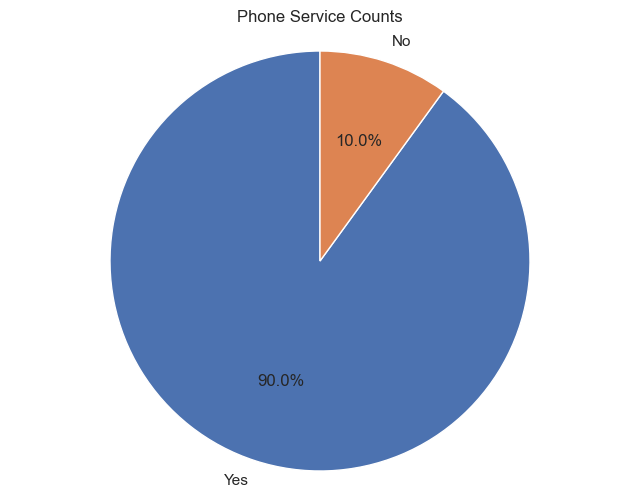

In [43]:
# Set the style of the plot
sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))

# Calculate the count of each category
counts = train['PhoneService'].value_counts()

# Create the pie chart
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title("Phone Service Counts")

# Show the plot
plt.show()

##### MultipleLines

In [44]:
train['MultipleLines'].unique()

array(['No', 'False', 'True', 'No phone service', 'Yes'], dtype=object)

In [45]:
# Change all entries under MultipleLines to 'Yes' or 'No'
replacement_values = {'True': 'Yes', 'False':'No'}

train['MultipleLines'] = train['MultipleLines'].replace(replacement_values)

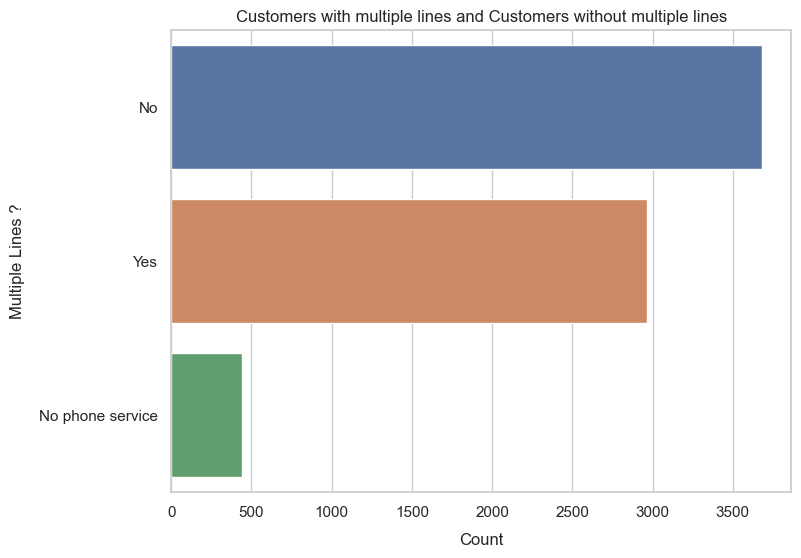

In [46]:
# Set the style of the plot
sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))  
# Create the horizontal bar plot
sns.countplot(y='MultipleLines', data=train)
plt.xlabel("Count", labelpad=10)
plt.ylabel("Multiple Lines ?", labelpad=10)
plt.title("Customers with multiple lines and Customers without multiple lines", y=1)

# Show the plot
plt.show()

##### Internet Service column

In [47]:
train['InternetService'].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [48]:
# Change all entries under Internet Service to 'Yes' or 'No'
replacement_values = {'Fiber optic': 'Yes', 'DSL':'Yes'}

train['InternetService'] = train['InternetService'].replace(replacement_values)

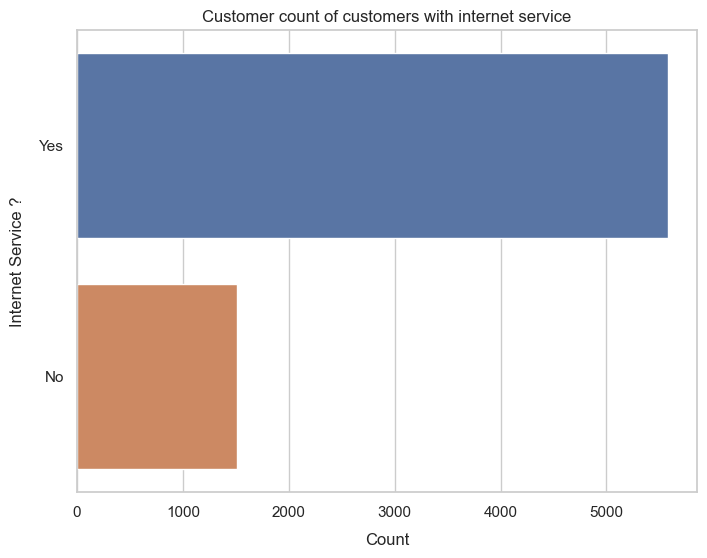

In [49]:
# Set the style of the plot
sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))  
# Create the horizontal bar plot
sns.countplot(y='InternetService', data=train)
plt.xlabel("Count", labelpad=10)
plt.ylabel("Internet Service ?", labelpad=10)
plt.title("Customer count of customers with internet service", y=1)

# Show the plot
plt.show()

##### Online Security 

In [50]:
train['OnlineSecurity'].unique()

array(['False', 'True', 'No', 'Yes', 'No internet service'], dtype=object)

In [51]:
# Change all entries under Online Security to 'Yes' or 'No'
replacement_values = {'True': 'Yes', 'False':'No'}

train['OnlineSecurity'] = train['OnlineSecurity'].replace(replacement_values)

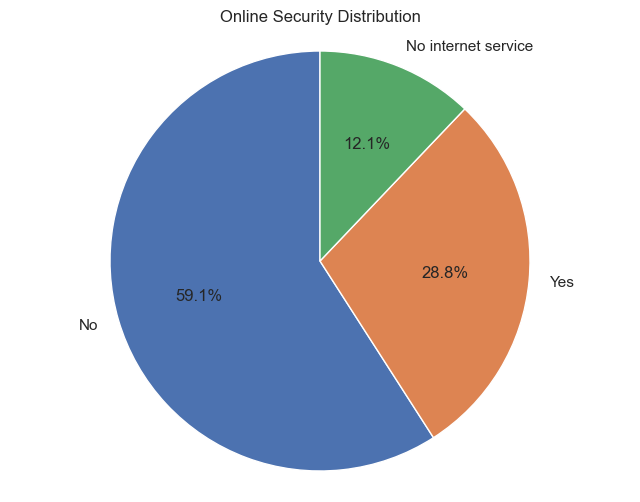

In [52]:
# Set the style of the plot
sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))

# Calculate the count of each category
counts = train['OnlineSecurity'].value_counts()

# Create the pie chart
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title("Online Security Distribution")

# Show the plot
plt.show()

##### OnlineBackup

In [53]:
train['OnlineBackup'].unique()

array(['True', 'False', 'No', 'Yes', 'No internet service'], dtype=object)

In [54]:
# Change all entries under Online Backup to 'Yes' or 'No'
replacement_values = {'True': 'Yes', 'False':'No'}

train['OnlineBackup'] = train['OnlineBackup'].replace(replacement_values)

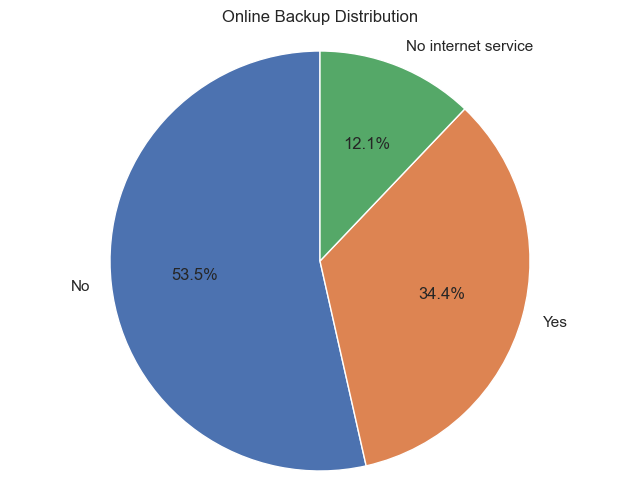

In [55]:
# Set the style of the plot
sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))

# Calculate the count of each category
counts = train['OnlineBackup'].value_counts()

# Create the pie chart
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title("Online Backup Distribution")

# Show the plot
plt.show()

##### Device Protection 

In [56]:
train['DeviceProtection'].unique()

array(['False', 'True', 'No', 'Yes', 'No internet service'], dtype=object)

In [57]:
# Change all entries under DeviceProtection to 'Yes' or 'No'
replacement_values = {'True': 'Yes', 'False':'No'}

train['DeviceProtection'] = train['DeviceProtection'].replace(replacement_values)

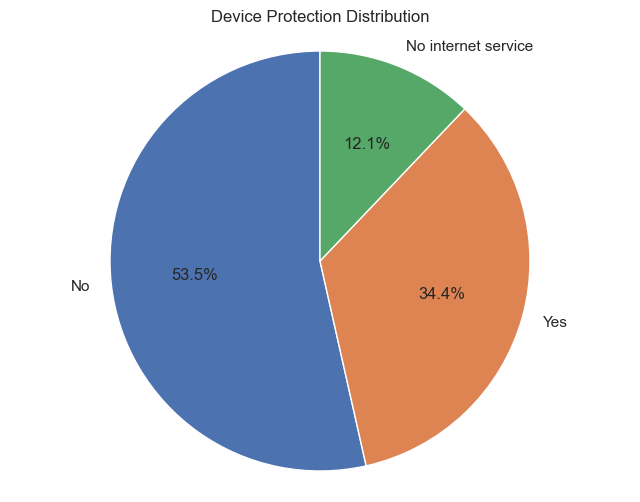

In [58]:
# Set the style of the plot
sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))

# Calculate the count of each category
counts = train['DeviceProtection'].value_counts()

# Create the pie chart
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title("Device Protection Distribution")

# Show the plot
plt.show()

##### TechSupport         

In [59]:
train['TechSupport'].unique()

array(['False', 'True', 'No', 'Yes', 'No internet service'], dtype=object)

In [60]:
# Change all entries under Tech Support to 'Yes' or 'No'
replacement_values = {'True': 'Yes', 'False':'No'}

train['TechSupport'] = train['TechSupport'].replace(replacement_values)

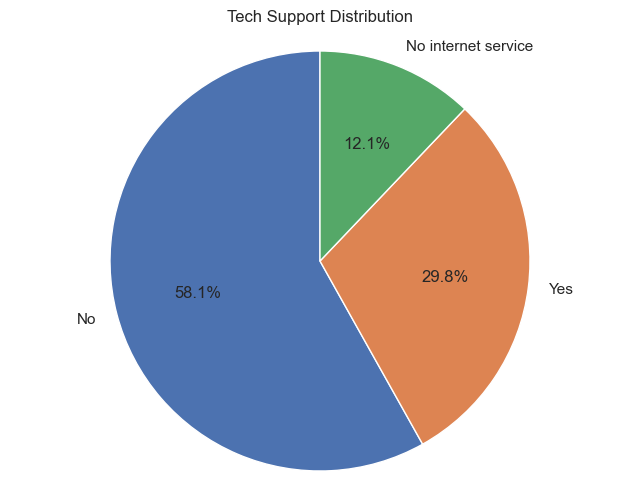

In [61]:
# Set the style of the plot
sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))

# Calculate the count of each category
counts = train['TechSupport'].value_counts()

# Create the pie chart
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title("Tech Support Distribution")

# Show the plot
plt.show()

##### StreamingTV 

In [62]:
train['StreamingTV'].unique()

array(['False', 'True', 'No', 'Yes', 'No internet service'], dtype=object)

In [63]:
# Change all entries under Streaming TV to 'Yes' or 'No'
replacement_values = {'True': 'Yes', 'False':'No'}

train['StreamingTV'] = train['StreamingTV'].replace(replacement_values)

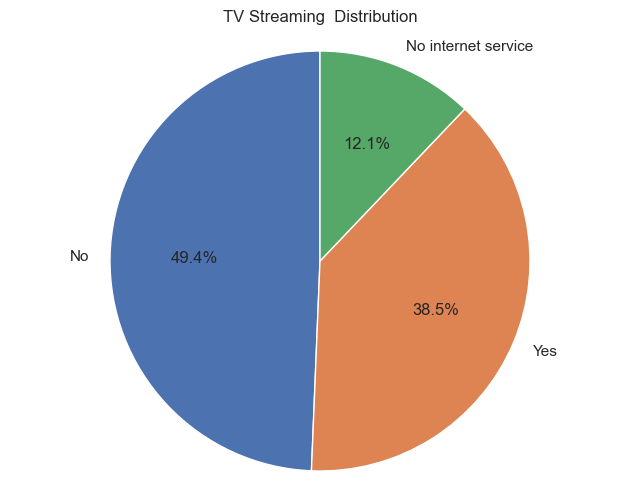

In [64]:
# Set the style of the plot
sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))

# Calculate the count of each category
counts = train['StreamingTV'].value_counts()

# Create the pie chart
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title("TV Streaming  Distribution")

# Show the plot
plt.show()

##### StreamingMovies

In [65]:
train['StreamingMovies'].unique()

array(['False', 'True', 'No', 'Yes', 'No internet service'], dtype=object)

In [66]:
# Change all entries under Streaming Movies to 'Yes' or 'No'
replacement_values = {'True': 'Yes', 'False':'No'}

train['StreamingMovies'] = train['StreamingMovies'].replace(replacement_values)

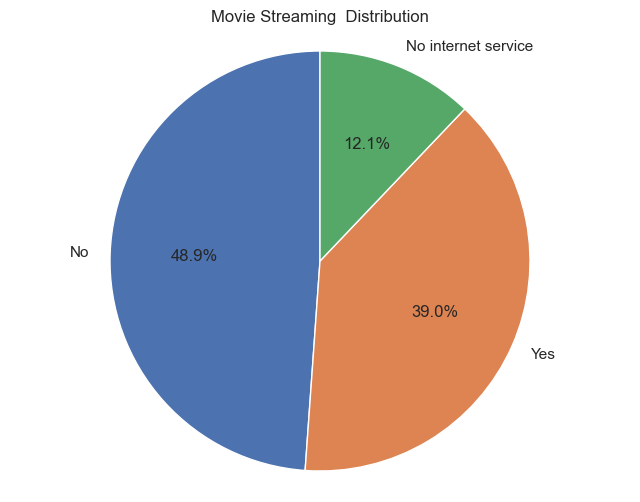

In [67]:
# Set the style of the plot
sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))

# Calculate the count of each category
counts = train['StreamingMovies'].value_counts()

# Create the pie chart
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title("Movie Streaming  Distribution")

# Show the plot
plt.show()

##### Contract

In [68]:
train['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

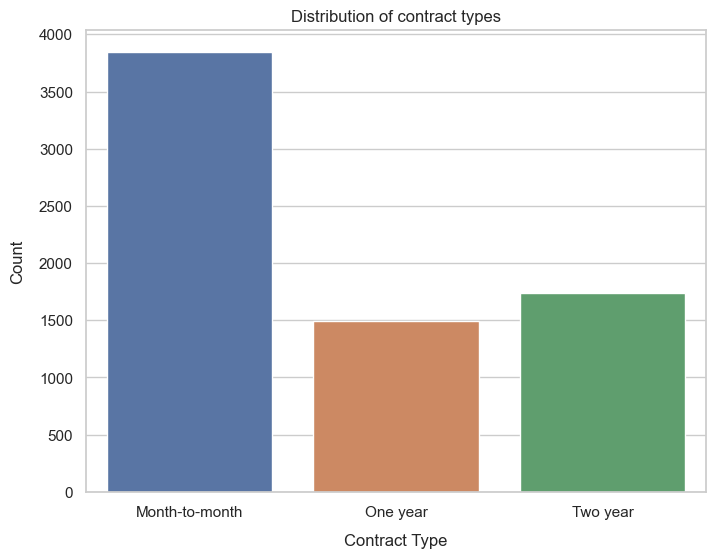

In [69]:
# Set the style of the plot
sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))  
# Create the horizontal bar plot
sns.countplot(x='Contract', data=train)
plt.xlabel("Contract Type", labelpad=10)
plt.ylabel("Count", labelpad=10)
plt.title("Distribution of contract types", y=1)

# Show the plot
plt.show()

##### PaperlessBilling

In [70]:
train['PaperlessBilling'].unique()

array(['True', 'False', 'Yes', 'No'], dtype=object)

In [71]:
# Change all entries under PaperlessBilling to 'Yes' or 'No'
replacement_values = {'True': 'Yes', 'False':'No'}

train['PaperlessBilling'] = train['PaperlessBilling'].replace(replacement_values)

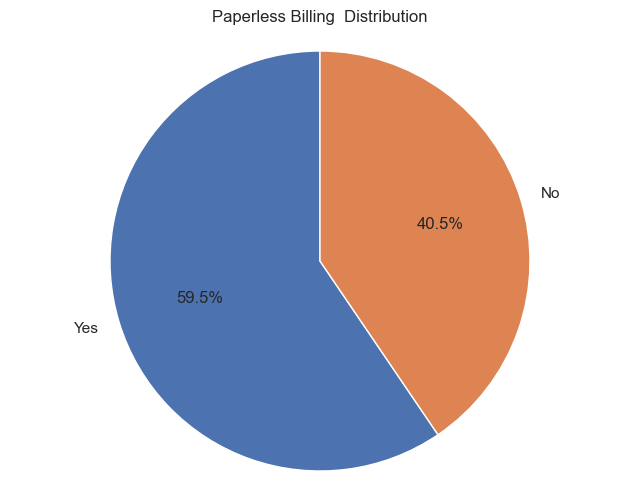

In [72]:
# Set the style of the plot
sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))

# Calculate the count of each category
counts = train['PaperlessBilling'].value_counts()

# Create the pie chart
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title("Paperless Billing  Distribution")

# Show the plot
plt.show()

##### PaymentMethod 

In [73]:
train['PaymentMethod'].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

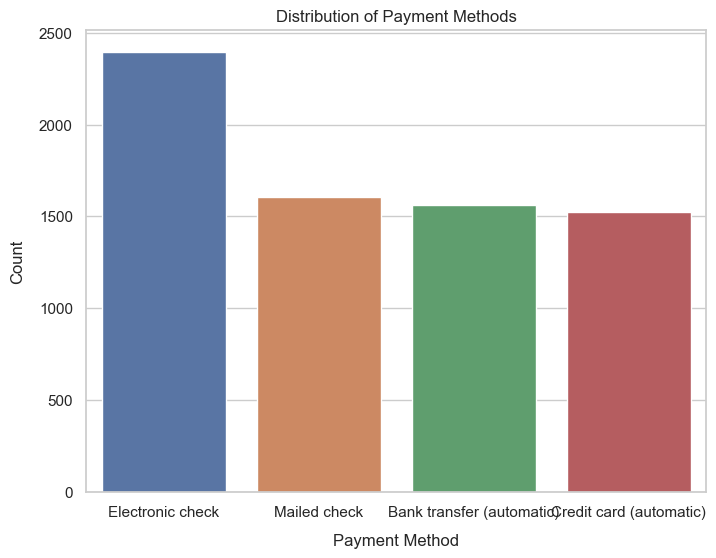

In [74]:
# Set the style of the plot
sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))  
# Create the horizontal bar plot
sns.countplot(x='PaymentMethod', data=train)
plt.xlabel("Payment Method", labelpad=10)
plt.ylabel("Count", labelpad=10)
plt.title("Distribution of Payment Methods", y=1)

# Show the plot
plt.show()

##### MonthlyCharges 

In [75]:
train['MonthlyCharges']

0        29.850000
1        56.950001
2        53.849998
3        42.299999
4        70.699997
           ...    
2038     84.800000
2039    103.200000
2040     29.600000
2041     74.400000
2042    105.650000
Name: MonthlyCharges, Length: 7086, dtype: float64

In [76]:
train['MonthlyCharges'].max()

118.6500015258789

In [77]:
train['MonthlyCharges'].min()

18.399999618530277

In [78]:
# Group the tenure in bins of 12 months
labels = ["{0} - {1}".format(i, i + 19) for i in range(1, 119, 20)]

train['MonthlyCharges_range'] = pd.cut(train.MonthlyCharges, range(1, 120, 19), right=False, labels=labels)

# Counts of each tenure range
train['MonthlyCharges_range'].value_counts()

MonthlyCharges_range
81 - 100     1769
61 - 80      1327
21 - 40      1201
101 - 120    1141
41 - 60       989
1 - 20        600
Name: count, dtype: int64

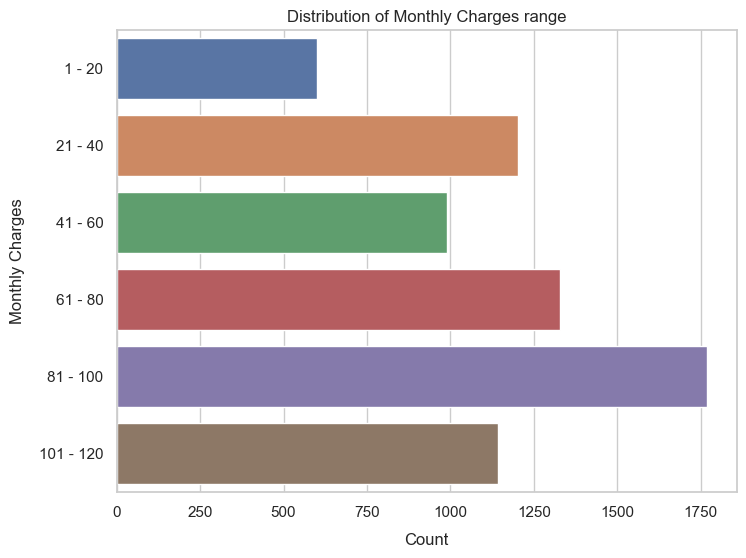

In [79]:
# Set the style of the plot
sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))  
# Create the horizontal bar plot
sns.countplot(y='MonthlyCharges_range', data=train)
plt.xlabel("Count", labelpad=10)
plt.ylabel("Monthly Charges", labelpad=10)
plt.title("Distribution of Monthly Charges range", y=1)

# Show the plot
plt.show()

##### TotalCharges 

In [80]:
train['TotalCharges']

0       29.850000381469727
1                   1889.5
2        108.1500015258789
3                  1840.75
4       151.64999389648438
               ...        
2038                1990.5
2039                7362.9
2040                346.45
2041                 306.6
2042                6844.5
Name: TotalCharges, Length: 7086, dtype: object

In [81]:
train['TotalCharges'].dtype

dtype('O')

In [82]:
# Replace empty cells with '0'
train['TotalCharges'] = train['TotalCharges'].str.replace('', '0')
train['TotalCharges'] = train['TotalCharges'].str.replace('0 0', '0')

In [83]:
train['TotalCharges'] = train['TotalCharges'].astype(float)

In [84]:
train['TotalCharges'].dtype

dtype('float64')

##### Churn

In [85]:
# Check for unique values
train['Churn'].unique()

array(['False', 'True', 'No', 'Yes'], dtype=object)

In [86]:
# Change all entries under churn to 'Yes' or 'No'
replacement_values = {'False': 'No', 'True': 'Yes'}

train['Churn'] = train['Churn'].replace(replacement_values)

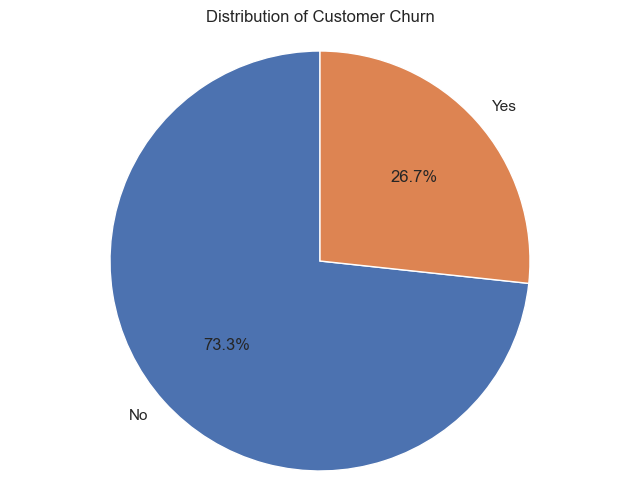

In [87]:
# Set the style of the plot
sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))

# Calculate the count of each category
counts = train['Churn'].value_counts()

# Create the pie chart
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title("Distribution of Customer Churn")

# Show the plot
plt.show()

The churn rate is 26.7%

## Questions and Answers

### Univariate Analysis 

### 1. Does the gender of the customer affect the churn rate?


In [88]:
# Grouping the data by 'gender' and 'churn' and calculating the counts
grouped_data = train.groupby(['gender', 'Churn']).size().reset_index(name='count')

In [89]:
# Creating the grouped bar chart
fig = px.bar(grouped_data, x='gender', y='count', color='Churn', barmode='group')

# Customizing the chart layout
fig.update_layout(
    title="Distribution of Churn by Gender",
    xaxis_title="Gender",
    yaxis_title="Count",
    legend_title="Churn",
)

# Displaying the chart
fig.show()

938 females churned and 954 males churned. It is hard to tell if the gender of the customer affects the churn rate as the difference is not so significant

### 2. Are senior citizens more reluctant to churn than those who are not senior citizens?

In [90]:
# Grouping the data by 'SeniorCitizen' and 'Churn' and calculating the counts
grouped_data = train.groupby(['SeniorCitizen', 'Churn']).size().reset_index(name='count')

In [91]:
# Creating the grouped bar chart 
fig = px.bar(grouped_data, x='SeniorCitizen', y='count', color='Churn', barmode='group')

# Customizing the x-axis labels
fig.update_xaxes(
    ticktext=['No', 'Yes'],
    tickvals=[0, 1]
)
# Customizing the chart layout
fig.update_layout(
    title="Distribution of Churn by Senior Citizens",
    xaxis_title="Senior Citizen",
    yaxis_title="Count",
    legend_title="Churn",
)

# Displaying the chart
fig.show()

Per the distribution, those that are not senior citizens are more likely to churn

### 3. How does the amount spent per month affect churn?

For this distribution, we would have to look at segmentation of the monthly charges

In [92]:
# Grouping the data by 'MonthlyCharges_range' and 'Churn' and calculating the counts
grouped_data = train.groupby(['MonthlyCharges_range', 'Churn']).size().reset_index(name='count')

In [93]:
# Creating the grouped bar chart
fig = px.bar(grouped_data, x='MonthlyCharges_range', y='count', color='Churn', barmode='group')

# Customizing the chart layout
fig.update_layout(
    title="Distribution of Churn by Range of Monthly Charges",
    xaxis_title="Monthly Charge Range",
    yaxis_title="Count",
    legend_title="Churn",
)

# Displaying the chart
fig.show()

Customers that spend between 80 to 101 dollars monthly are more likely to churn than any other group

### 4. How important is tech support in customer retention?

In [94]:
# Grouping the data by 'TechSupport' and 'Churn' and calculating the counts
grouped_data = train.groupby(['TechSupport', 'Churn']).size().reset_index(name='count')


In [95]:
# Creating the grouped bar chart 
fig = px.bar(grouped_data, x='TechSupport', y='count', color='Churn', barmode='group')

# Customizing the chart layout
fig.update_layout(
    title="Tech Support and Customer Retention",
    xaxis_title="Tech Support?",
    yaxis_title="Count",
    legend_title="Churn",
)

# Displaying the chart
fig.show()

5,576 had internet service. Out of this number, 3,467 did not opt for tech support and 2,109 customers opted for tech support. Comparing this with churn, customers who chose not to go for tech support were more likely(1448 customers) to churn than those who subscribed for tech support(331 customers). With the difference in the sum of yes and no responses being close, it means tech support is important for customer retention

### 5. Does internet service subscription affect the payment method used?

In [96]:
# Grouping the data by 'MonthlyCharges_range' and 'Churn' and calculating the counts
grouped_data = train.groupby(['InternetService', 'PaymentMethod']).size().reset_index(name='count')

In [97]:
# Creating the grouped bar chart 
fig = px.bar(grouped_data, x='InternetService', y='count', color='PaymentMethod', barmode='group')

# Customizing the chart layout
fig.update_layout(
    title="Internet Service Subscription and Payment Methods",
    xaxis_title="Internet Service",
    yaxis_title="Count",
    legend_title="Payment Methods",
)

# Displaying the chart
fig.show()

### 6. What tenure range is very likely to churn? 

In [98]:
# Grouping the data by 'MonthlyCharges_range' and 'Churn' and calculating the counts
grouped_data = train.groupby(['tenure_range', 'Churn']).size().reset_index(name='count')

In [99]:
# Creating the grouped bar chart 
fig = px.bar(grouped_data, x='tenure_range', y='count', color='Churn', barmode='group')

# Customizing the chart layout
fig.update_layout(
    title="Churners accirding Tenure range",
    xaxis_title="Tenure Range",
    yaxis_title="Count",
    legend_title="Churn",
)

# Displaying the chart
fig.show()

The company is most likely to lose a customer in the first 12 months of the customer's tenure than at any other time

### Bivariate and Multivariate Analysis

### 7. Does having a partner and dependents influence churn rate positively or negatively?

In [100]:
# Filter the data for customers who answered 'Yes' under 'Partner' and 'Yes' under 'Dependents'
filtered_data = train[(train['Partner'] == 'Yes') & (train['Dependents'] == 'Yes')]


In [101]:
# Group the filtered data by 'Churn' and calculate the count
grouped_data = filtered_data.groupby('Churn').size().reset_index(name='Count')


In [102]:
# Create the bar chart using Plotly Express
fig = px.bar(grouped_data, x='Churn', y='Count', color='Churn',
             labels={'Count': 'Count', 'Churn': 'Churn'})

# Set the layout of the plot
fig.update_layout(
    title="Churn Distribution among Customers with Partners and Dependents",
    xaxis_title="Churn",
    yaxis_title="Count",
    legend_title="Churn"
)

# Show the plot
fig.show()

In [103]:
# Filter the data for customers who answered 'No' under 'Partner' and 'No' under 'Dependents'
filtered_data = train[(train['Partner'] == 'No') & (train['Dependents'] == 'No')]

In [104]:
# Group the filtered data by 'Churn' and calculate the count
grouped_data = filtered_data.groupby('Churn').size().reset_index(name='Count')

In [105]:
# Create the bar chart using Plotly Express
fig = px.bar(grouped_data, x='Churn', y='Count', color='Churn',
             labels={'Count': 'Count', 'Churn': 'Churn'})

# Set the layout of the plot
fig.update_layout(
    title="Churn Distribution among Customers without Partners and Dependents",
    xaxis_title="Churn",
    yaxis_title="Count",
    legend_title="Churn"
)

# Show the plot
fig.show()

Churn rate of customers with partners and dependents was 14% while churn rate of customers without partners and dependents was 34%

### 8. Do customers with both phone service and internet service churn more than customers with one of the two?

In [106]:
# Filter the data for customers who answered Yes' under 'PhoneService' and'Yes' under 'InternetService' 
filtered_data = train[(train['PhoneService'] == 'Yes') &  (train['InternetService'] == 'Yes')]
filtered_data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_range,MonthlyCharges_range
1,Male,0,No,No,34,Yes,No,Yes,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.950001,1.080809e+07,No,25 - 36,41 - 60
2,Male,0,No,No,2,Yes,No,Yes,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.849998,1.000800e+05,Yes,1 - 12,41 - 60
4,Female,0,No,No,2,Yes,No,Yes,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.699997,1.050101e+05,Yes,1 - 12,61 - 80
5,Female,0,No,No,8,Yes,Yes,Yes,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.650002,8.020001e+05,Yes,1 - 12,101 - 120
6,Male,0,No,Yes,22,Yes,Yes,Yes,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.099998,1.090409e+07,No,13 - 24,81 - 100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2035,Male,0,No,No,19,Yes,No,Yes,No,No,No,No,Yes,No,Month-to-month,Yes,Bank transfer (automatic),78.700000,1.040905e+07,No,13 - 24,81 - 100
2038,Male,0,Yes,Yes,24,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.800000,1.090900e+07,No,13 - 24,81 - 100
2039,Female,0,Yes,Yes,72,Yes,Yes,Yes,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.200000,7.030602e+07,No,61 - 72,101 - 120
2041,Male,1,Yes,No,4,Yes,Yes,Yes,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.400000,3.000601e+05,Yes,1 - 12,61 - 80


In [107]:
# Calculate churn rate for customers with phone service or internet service
churn_rate = filtered_data['Churn'].value_counts() / len(filtered_data) * 100

In [108]:
# Plotting the churn rate
fig = px.bar(churn_rate, x=churn_rate.index, y=churn_rate.values,color ='count', 
             labels={'x': 'Churn', 'y': 'Churn Rate (%)'},
             title='Churn Rate of Customers with Phone and Internet Service')
fig.show()

In [109]:
# Filter customers with phone service or internet service
has_phone_or_internet = train[(train['InternetService'] == 'Yes') | (train['PhoneService'] == 'Yes')]


In [110]:
# Calculate churn rate for customers with phone service or internet service
churn_rate = has_phone_or_internet['Churn'].value_counts() / len(has_phone_or_internet) * 100

In [111]:
# Plotting the churn rate
fig = px.bar(churn_rate, x=churn_rate.index, y=churn_rate.values,color ='count', 
             labels={'x': 'Churn', 'y': 'Churn Rate (%)'},
             title='Churn Rate of Customers with Phone or Internet Service')
fig.show()

Churn rate for customers with both Phone and Internet service is about 32.9% and Churn rate for customers with either Phone or Internet Service is 26.7%

### 9. What is the distribution of the churn rates of customers that have both internet service and online security against those that have internet service and no online security?

In [112]:
# Filter customers with internet service and online security
filtered_data1 = train[(train['InternetService'] == 'Yes') & (train['OnlineSecurity'] == 'Yes')]

# Filter customers with internet service and no online security
filtered_data2 = train[(train['InternetService'] == 'Yes') & (train['OnlineSecurity'] == 'No')]

In [113]:
# Calculate churn rate for customers with internet service and online security
churn_rate1 = filtered_data1['Churn'].value_counts() / len(filtered_data1) * 100
churn_rate1

Churn
No     85.105341
Yes    14.894659
Name: count, dtype: float64

In [114]:
churn_rate2 = filtered_data2['Churn'].value_counts() / len(filtered_data2) * 100
churn_rate2

Churn
No     58.286199
Yes    41.713801
Name: count, dtype: float64

In [115]:

# Create a figure with two subplots
fig = px.bar(churn_rate1, x=churn_rate1.index, y=churn_rate1.values,color='Churn',
             labels={'x': 'Churn', 'y': 'Churn Rate (%)'},
             title='Churn Rate of Customers with Internet Service and Online Security')

fig.add_trace(px.bar(churn_rate2, x=churn_rate2.index, y=churn_rate2.values,color='Churn',
                     labels={'x': 'Churn', 'y': 'Churn Rate (%)'},
                     title='Churn Rate of Customers with Internet Service and No Online Security').data[0])

# Update layout to show subplots side by side
fig.update_layout(barmode='group')

fig.show()


ValueError: Value of 'color' is not the name of a column in 'data_frame'. Expected one of ['count'] but received: Churn

Customers with internet service and online security had a churn rate of 14.9% whereas customers with internet service and no online security had a churn rate of 41.7%

## Hypothesis Testing

In [ ]:
# Filter customers that have month to month contracts
month = train[(train['Contract'] == 'Month-to-month')]

# Filter customers that have contracts that are one year and two year
year = train[(train['Contract'] == 'One year') & (train['Contract'] == 'Two year')]

In [ ]:
# Calculate churn rate for customers with month to month contracts
churn_month = month['Churn'].value_counts() / len(month) * 100
churn_month

Churn
No     56.667533
Yes    43.332467
Name: count, dtype: float64

In [ ]:
# Calculate churn rate for customers with yearly contracts
churn_year = year['Churn'].value_counts() / len(year) * 100


In [ ]:
# Create a figure with two subplots
fig = px.bar(churn_month, x=churn_month.index, y=churn_month.values,
             labels={'x': 'Churn', 'y': 'Churn Rate (%)'},
             title='Churn Rate of Customers with Month to Month Contracts against Customers with Year to Year Contracts')

fig.add_trace(px.bar(churn_year, x=churn_year.index, y=churn_year.values,
                     labels={'x': 'Churn', 'y': 'Churn Rate (%)'},
                     title='Churn Rate of Customers with Yearly Contracts').data[0])

# Update layout to show subplots side by side
fig.update_layout(barmode='group')

fig.show()


ValueError: Cannot accept list of column references or list of columns for both `x` and `y`.

### Customers on the Month to Month contract type had a higher churn rate than customers on the One Year or Two Year Contracts and so we reject the Null Hypothesis 

In [116]:
# make all column names lowercase in training dataset
train.columns = map(str.lower, train.columns)
train.columns

Index(['gender', 'seniorcitizen', 'partner', 'dependents', 'tenure',
       'phoneservice', 'multiplelines', 'internetservice', 'onlinesecurity',
       'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv',
       'streamingmovies', 'contract', 'paperlessbilling', 'paymentmethod',
       'monthlycharges', 'totalcharges', 'churn', 'tenure_range',
       'monthlycharges_range'],
      dtype='object')

In [117]:
# make all column names lowercase in test dataset
test.columns = map(str.lower, test.columns)
test.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges'],
      dtype='object')

In [118]:
# Save datasets
train.to_csv('training_dataset.csv')
test.to_csv('testing_dataset.csv')

### Bivariate Analysis

### Violin Plot for Comparing Churn (Yes/No) vrs Monthly charges

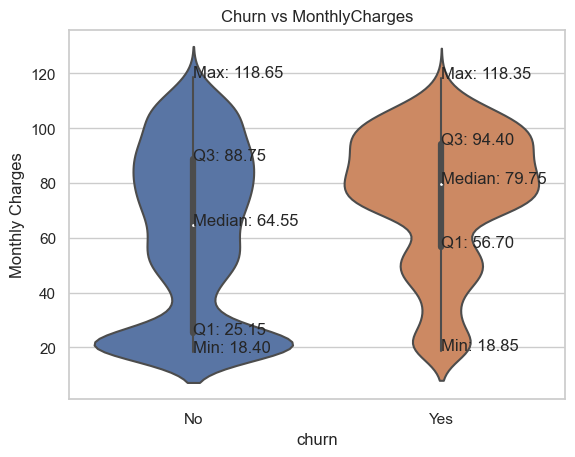

In [119]:
# Create a violin plot
ax = sns.violinplot(x='churn', y='monthlycharges', data=train)

# Add title and y-label
ax.set_title('Churn vs MonthlyCharges')
ax.set_ylabel('Monthly Charges')

# Add statistical values for the spread
for i, category in enumerate(train['churn'].unique()):
    data = train[train['churn'] == category]['monthlycharges']
    q1 = data.quantile(0.25)
    median = data.median()
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    upper_whisker = data[data <= (q3 + 1.5*iqr)].max()
    lower_whisker = data[data >= (q1 - 1.5*iqr)].min()
    ax.text(i, upper_whisker, f"Max: {upper_whisker:.2f}")
    ax.text(i, q3, f"Q3: {q3:.2f}")
    ax.text(i, median, f"Median: {median:.2f}")
    ax.text(i, q1, f"Q1: {q1:.2f}")
    ax.text(i, lower_whisker, f"Min: {lower_whisker:.2f}")

# Set legend and show plot
#ax.legend(labels=['No Churn', 'Churn'])
plt.show()

### Monthly Charges vs. Total Charges (Correlation Analysis)

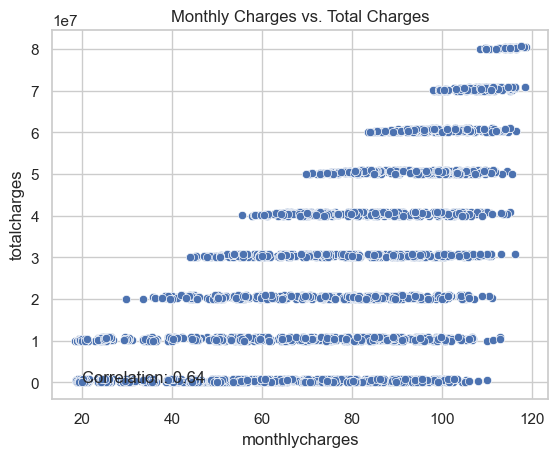

In [120]:
# Calculate correlation between MonthlyCharges and TotalCharges
corr = np.corrcoef(train['monthlycharges'], train['totalcharges'])[0, 1]

# Create scatter plot
sns.scatterplot(x='monthlycharges', y='totalcharges', data=train)
plt.title('Monthly Charges vs. Total Charges')

# Add correlation value to the plot
plt.text(20, 8000, f'Correlation: {corr:.2f}')

plt.show()

### Tenure vs. Total Charges (Correlation Analysis)

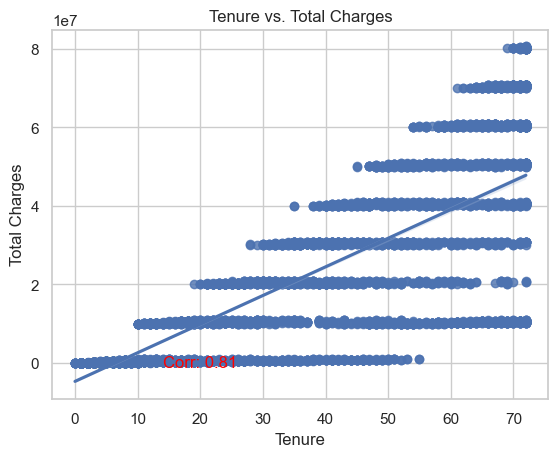

In [121]:
sns.regplot(x='tenure', y='totalcharges', data=train)
plt.title("Tenure vs. Total Charges")
plt.xlabel("Tenure")
plt.ylabel("Total Charges")

# Calculate correlation coefficient
corr = train['tenure'].corr(train['totalcharges'])
corr_text = f'Corr: {corr:.2f}'

# Add correlation value to the plot
plt.text(20, 8000, corr_text, ha='center', va='center', color='red')

plt.show()

### BoxPlot Analysis: Monthly Charges Vrs all Categorical Variables

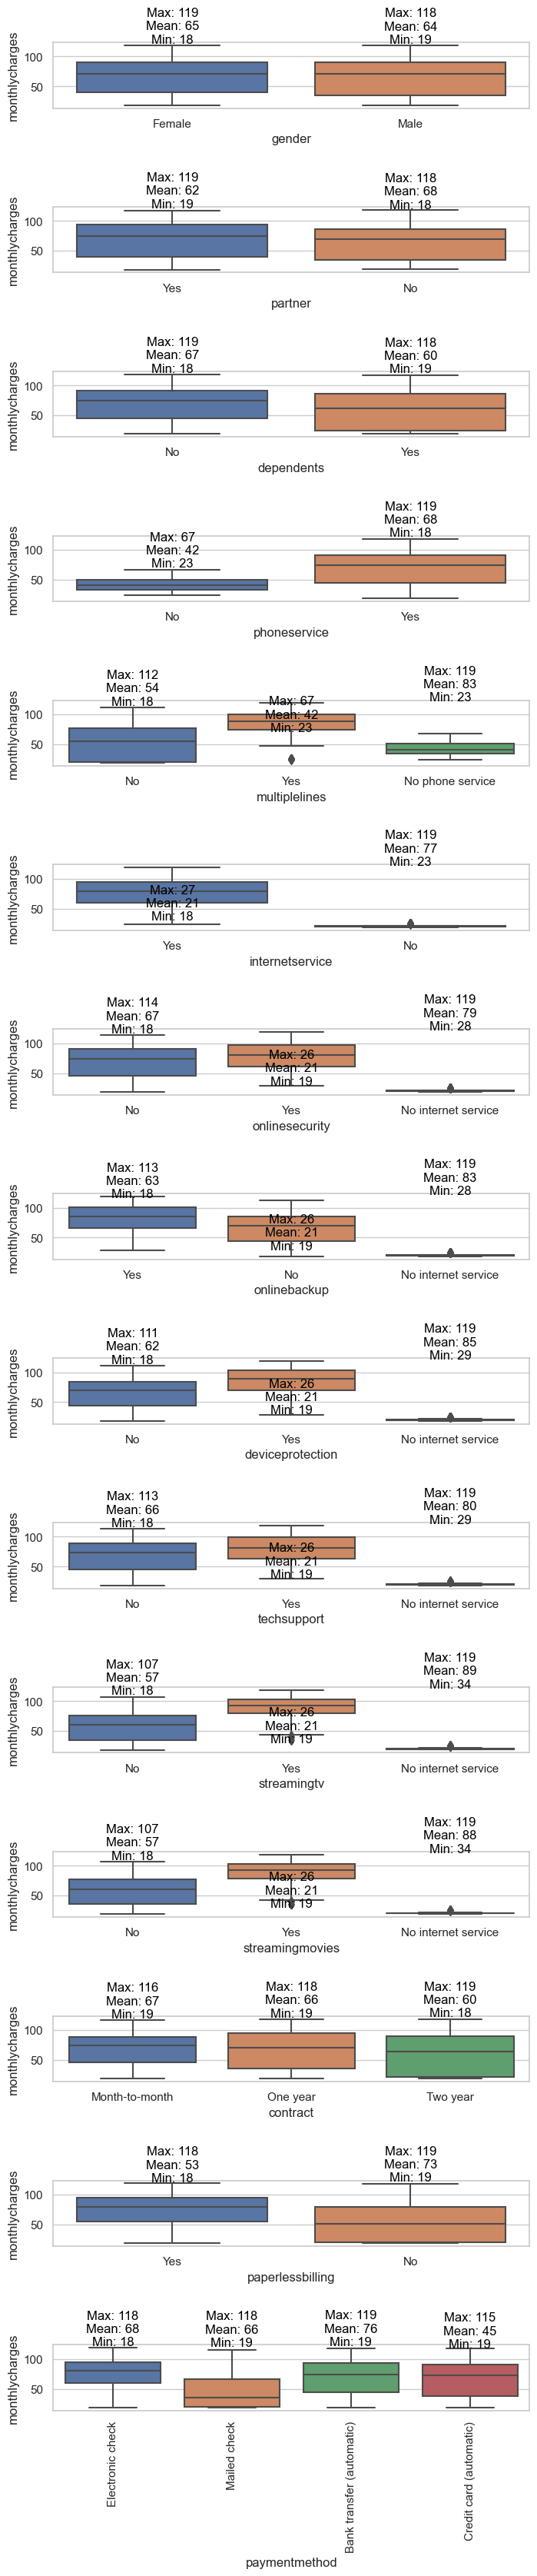

In [122]:
# Create a list of all categorical columns except Churn
cat_cols = train.select_dtypes(include=['object']).columns.drop(['churn'])

# Set up the subplots
fig, axes = plt.subplots(nrows=len(cat_cols), ncols=1, figsize=(8, 40))
plt.subplots_adjust(wspace=1.5, hspace=1.5)

# Loop through each categorical column and create a box plot with monthlycharges
for i, col in enumerate(cat_cols):
    sns.boxplot(x=col, y='monthlycharges', data=train, ax=axes[i])
    axes[i].set_xlabel(col)
    
    # Add mean, max, and min to the plot
    stats_df = train.groupby(col).agg({'monthlycharges': ['mean', 'max', 'min']})
    for idx, label in enumerate(stats_df.index):
        axes[i].text(idx, stats_df.loc[label, ('monthlycharges', 'max')], 
                      f"Max: {stats_df.loc[label, ('monthlycharges', 'max')]:.0f}\n"
                      f"Mean: {stats_df.loc[label, ('monthlycharges', 'mean')]:.0f}\n"
                      f"Min: {stats_df.loc[label, ('monthlycharges', 'min')]:.0f}", 
                      ha='center', va='bottom', color='black')
    
plt.xticks(rotation=90)
    
# Display the plot
plt.show()

### BoxPlot Analysis: Tenure Vrs all Categorical Variables

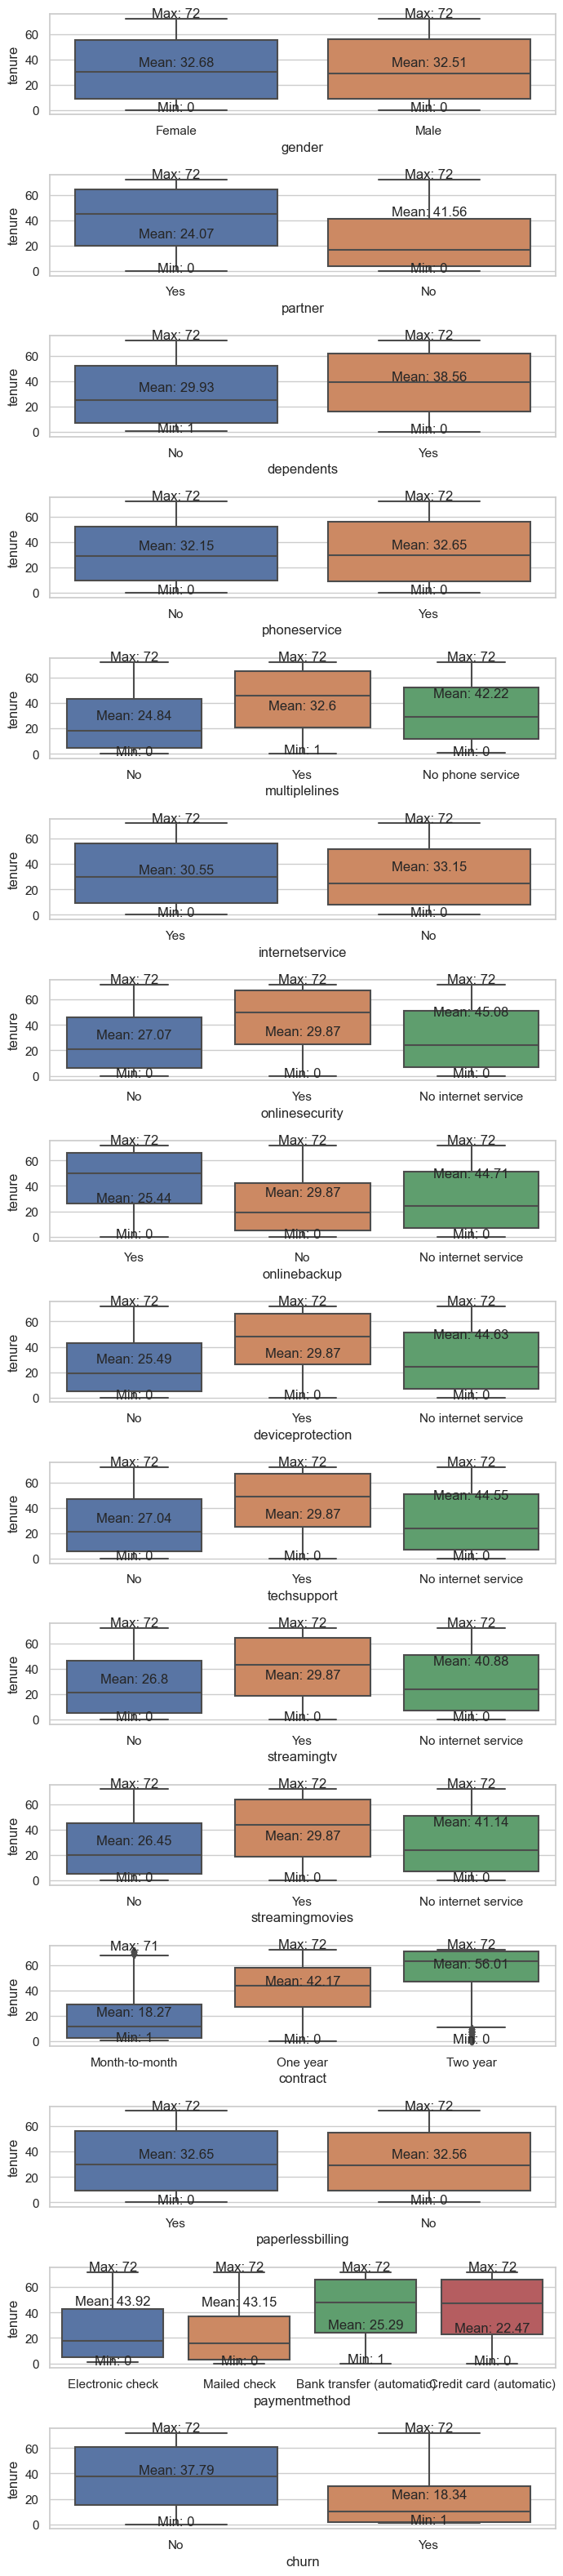

In [123]:
# Create a list of all categorical columns
cat_cols = list(train.select_dtypes(include=['object']).columns)

# Set up the subplots
fig, axes = plt.subplots(nrows=len(cat_cols), ncols=1, figsize=(8, 40))
plt.subplots_adjust(wspace=0.6, hspace=0.6)

# Loop through each categorical column and create a box plot with tenure
for i, col in enumerate(cat_cols):
    sns.boxplot(x=col, y='tenure', data=train, ax=axes[i])
    axes[i].set_xlabel(col)
    
    # Add statistical values to the plot
    mean = round(train.groupby(col)['tenure'].mean(), 2)
    max_val = train.groupby(col)['tenure'].max()
    min_val = train.groupby(col)['tenure'].min()
    
    for j in range(len(mean)):
        axes[i].text(j, max_val[j]+1, f'Max: {max_val[j]}', ha='center')
        axes[i].text(j, mean[j], f'Mean: {mean[j]}', ha='center', va='bottom')
        axes[i].text(j, min_val[j]-1, f'Min: {min_val[j]}', ha='center')
    
# Display the plot
plt.show()


### BoxPlot Analysis: TotalCharges Vrs all Categorical Variables

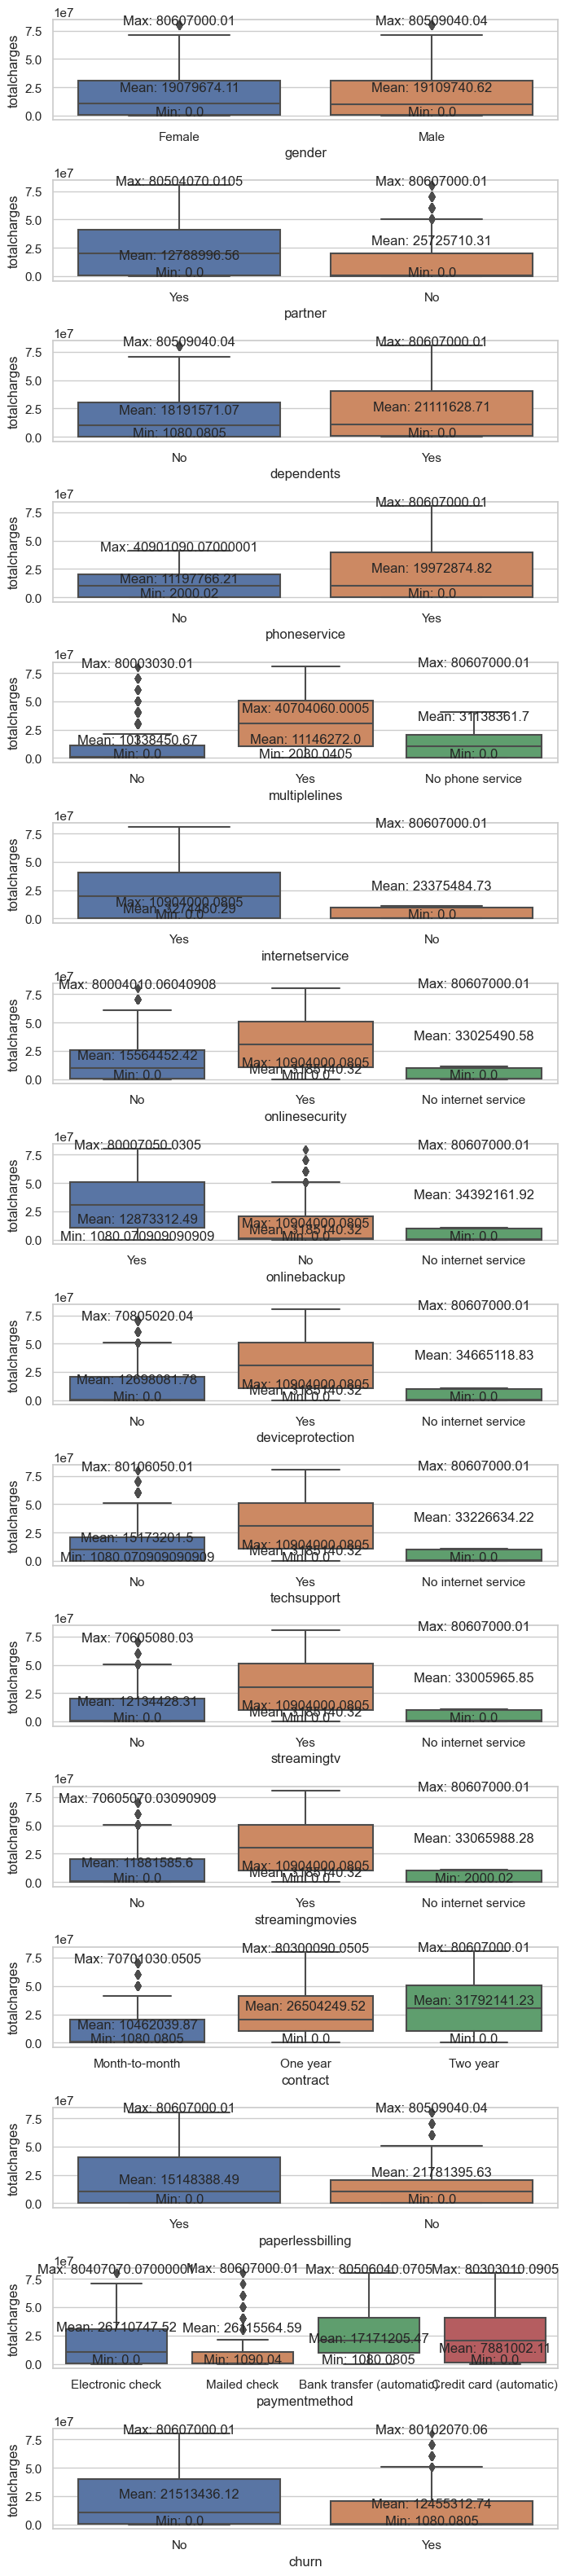

In [124]:
# Create a list of all categorical columns
cat_cols = list(train.select_dtypes(include=['object']).columns)

# Set up the subplots
fig, axes = plt.subplots(nrows=len(cat_cols), ncols=1, figsize=(8, 40))
plt.subplots_adjust(wspace=0.6, hspace=0.6)

# Loop through each categorical column and create a box plot with tenure
for i, col in enumerate(cat_cols):
    sns.boxplot(x=col, y='totalcharges', data=train, ax=axes[i])
    axes[i].set_xlabel(col)
    
    # Add statistical values to the plot
    mean = round(train.groupby(col)['totalcharges'].mean(), 2)
    max_val = train.groupby(col)['totalcharges'].max()
    min_val = train.groupby(col)['totalcharges'].min()
    
    for j in range(len(mean)):
        axes[i].text(j, max_val[j]+1, f'Max: {max_val[j]}', ha='center')
        axes[i].text(j, mean[j], f'Mean: {mean[j]}', ha='center', va='bottom')
        axes[i].text(j, min_val[j]-1, f'Min: {min_val[j]}', ha='center')
    
# Display the plot
plt.show()


# # Create a list of all categorical columns.
# cat_cols = train.select_dtypes(include=['object'])

# # Set up the subplots
# fig, axes = plt.subplots(nrows=len(cat_cols), ncols=1, figsize=(8, 40))
# plt.subplots_adjust(wspace=0.6, hspace=0.6)

# # Loop through each categorical column and create a box plot with totalcharges
# for i, col in enumerate(cat_cols):
#     sns.boxplot(x=col, y='totalcharges', data=train, ax=axes[i])
#     axes[i].set_xlabel(col)
    
#     # Add data labels above each figure
#     mean = round(train.groupby(col)['totalcharges'].mean(), 2)
#     max_val = train.groupby(col)['totalcharges'].max()
#     min_val = train.groupby(col)['totalcharges'].min()
    
        
#     for j in range(len(mean)):
#         axes[i].text(j, max_val[j]+1, f'Max: {max_val[j]}', ha='center')
#         axes[i].text(j, mean[j], f'Mean: {mean[j]}', ha='center', va='bottom')
#         axes[i].text(j, min_val[j]-1, f'Min: {min_val[j]}', ha='center')
    
# # Display the plot
# plt.show()

### Multivariate Analaysis

### Correlation between all the numerical attributes

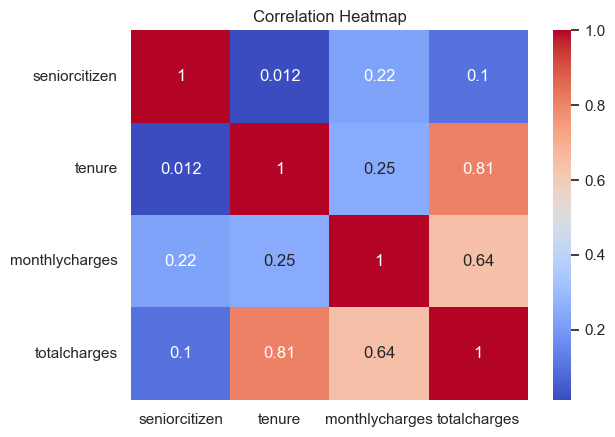

In [125]:
# Heatmap to visualize the correlation between all the numerical attributes in the dataset.

numeric_cols = ['seniorcitizen', 'tenure', 'monthlycharges', 'totalcharges']
corr_matrix = train[numeric_cols].corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

### Factor Analysis using correlation

In [126]:
from sklearn.preprocessing import LabelEncoder

df = train.copy()

# Convert the Churn column to numerical using label encoding
le = LabelEncoder()

df['Churn_encoded'] = le.fit_transform(df['Churn'])

# Compute the correlation between all the numerical attributes and the target variable (Churn_encoded)
correlations = df.corr()['Churn_encoded'].sort_values(ascending=False)

print(correlations)

KeyError: 'Churn'

### Monthly charges for each combination of internet service type and contract type

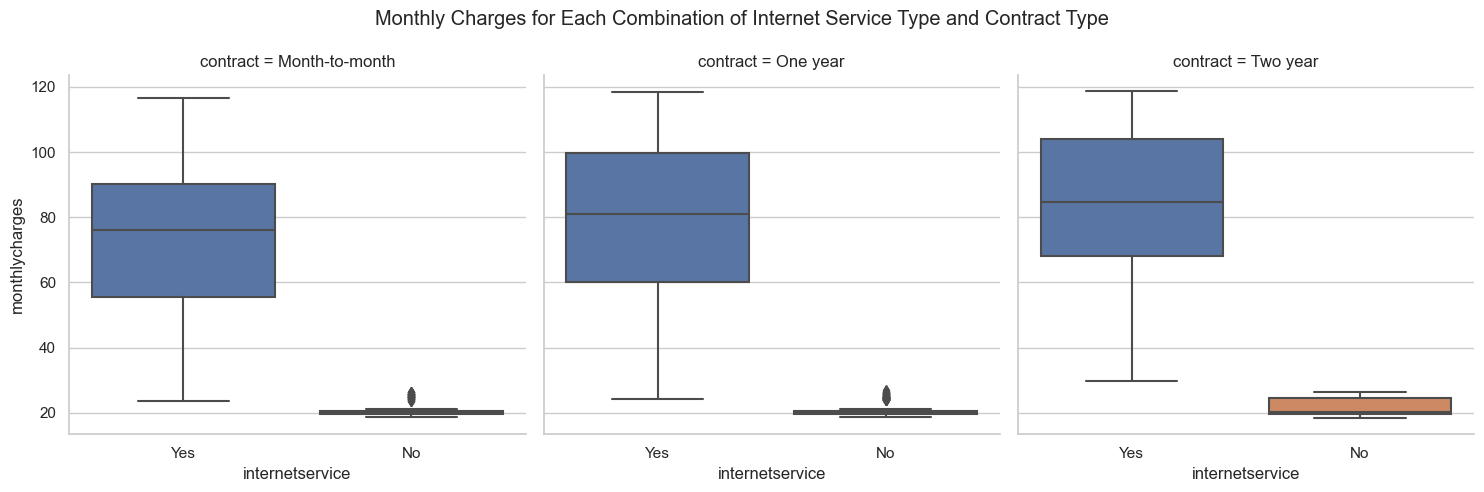

In [127]:
# Box plot of the monthly charges for each combination of internet service type and contract type.

# Filter the data for only the relevant columns
internet_contract = train[['internetservice', 'contract', 'monthlycharges']]

# Create the box plot
sns.catplot(x='internetservice', y='monthlycharges', col='contract', data=internet_contract, kind='box')

# Add plot titles and labels
plt.suptitle('Monthly Charges for Each Combination of Internet Service Type and Contract Type')
plt.subplots_adjust(top=0.85)
plt.show()

### Comparing the number of customers who churned and did not churn, grouped by internet service type and payment method

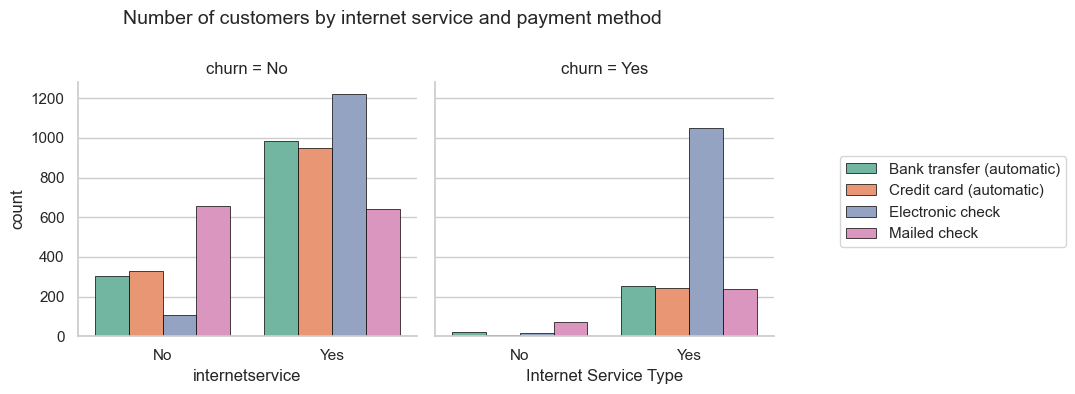

In [128]:
#Stacked bar chart to compare the number of customers who churned and did not churn, grouped by internet service type and payment method.

# Subset the data to include only relevant columns
train_sub = train[['churn', 'internetservice', 'paymentmethod']]

# Group by the variables and count the number of occurrences
churn_data_grouped = train_sub.groupby(['churn', 'internetservice', 'paymentmethod']).size().reset_index(name='count')

# Create a stacked bar chart
sns.set_style('whitegrid')
sns.set_palette('Set2')
sns.catplot(x='internetservice', y='count', hue='paymentmethod', col='churn', data=churn_data_grouped, kind='bar', height=4, aspect=1, legend=False, edgecolor='black', linewidth=0.5)

# Set the chart title and axes labels
plt.subplots_adjust(top=0.8)
plt.suptitle('Number of customers by internet service and payment method', fontsize=14)
plt.xlabel('Internet Service Type', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)

# Add a legend
handles, labels = plt.gca().get_legend_handles_labels()
plt.gcf().legend(handles, labels, bbox_to_anchor=(1.05, 0.5), loc='center left')